# CREDIT EDA ASSIGNMENT 

### submitted by - sampatharao lokesh

#### date - 26/04/2022

## importing libraries:-

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

##### our role in this assignment - in short we have to get the analytics about - loss of intrest like what are the factors important for recognizing genuine cutomers loss of principle and recognizing fake customers trends,like who are defaulting loans

## application_data inspection:-

In [2]:
inp1_apl = pd.read_csv("application_data.csv")
inp1_apl.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
inp1_apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [4]:
inp1_apl.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [5]:
#no.of rows and columns
inp1_apl.shape

(307511, 122)

In [6]:
inp1_apl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [7]:
type(inp1_apl)

pandas.core.frame.DataFrame

In [8]:
types = inp1_apl.dtypes
types

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

###### summary of application_data inspection or understanding:-


In [9]:
#-> there are 307511 rows and 122 columns
#-> there are 3 types of datatypes variables
   #-> integers,float,strings
     #int64(41), float64(65), object(16)

## previous_data inspection:-

In [10]:
inp2_pr = pd.read_csv("previous_application.csv")
inp2_pr.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
inp2_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [12]:
#no of rows and columns
inp2_pr.shape

(1670214, 37)

In [13]:
inp2_pr.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [14]:
#we will come back later to "previous_data" after completing data cleaning of "application_data"

##### summary of previous_data inspection or understanding:-

In [15]:
#-> there are 1670214 rows and 37 columns
#-> there are 3 types of datatypes variables
   #-> integers,float,strings
     #float64(15) , int64(6) , object(16)

### Data Cleaning and Manipulation of application_data :-

In [16]:
#how can we do that:-
 #1) fixing rows and columns
 #2) impute/remove missing values 
 #3) handling outliers
 #4) standardising values

In [17]:
#before fixing rows and columns, lets find out  missing_value

In [18]:
missing_value = inp1_apl.isnull(). sum() * 100 / len(inp1_apl)
missing_value

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

###### as per above percentage there are so many columns which are  missing and are above 50% lets find out the missing value which are above 50%

In [19]:
#to check how man null values are there in column, defining variable "nulls"

In [20]:
def nulls(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)


In [21]:
missing_50 = nulls(inp1_apl)[nulls(inp1_apl)>50]
print(missing_50)
print()
print("total", len(missing_50),"values are above 50%")

COMMONAREA_MEDI             69.87
COMMONAREA_AVG              69.87
COMMONAREA_MODE             69.87
NONLIVINGAPARTMENTS_MODE    69.43
NONLIVINGAPARTMENTS_AVG     69.43
NONLIVINGAPARTMENTS_MEDI    69.43
FONDKAPREMONT_MODE          68.39
LIVINGAPARTMENTS_MODE       68.35
LIVINGAPARTMENTS_AVG        68.35
LIVINGAPARTMENTS_MEDI       68.35
FLOORSMIN_AVG               67.85
FLOORSMIN_MODE              67.85
FLOORSMIN_MEDI              67.85
YEARS_BUILD_MEDI            66.50
YEARS_BUILD_MODE            66.50
YEARS_BUILD_AVG             66.50
OWN_CAR_AGE                 65.99
LANDAREA_MEDI               59.38
LANDAREA_MODE               59.38
LANDAREA_AVG                59.38
BASEMENTAREA_MEDI           58.52
BASEMENTAREA_AVG            58.52
BASEMENTAREA_MODE           58.52
EXT_SOURCE_1                56.38
NONLIVINGAREA_MODE          55.18
NONLIVINGAREA_AVG           55.18
NONLIVINGAREA_MEDI          55.18
ELEVATORS_MEDI              53.30
ELEVATORS_AVG               53.30
ELEVATORS_MODE

In [22]:
#lets find out which columns have 50% missing values
missing_50.index

Index(['COMMONAREA_MEDI', 'COMMONAREA_AVG', 'COMMONAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAPARTMENTS_MEDI', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAPARTMENTS_MEDI', 'FLOORSMIN_AVG', 'FLOORSMIN_MODE',
       'FLOORSMIN_MEDI', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_MODE',
       'YEARS_BUILD_AVG', 'OWN_CAR_AGE', 'LANDAREA_MEDI', 'LANDAREA_MODE',
       'LANDAREA_AVG', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG',
       'BASEMENTAREA_MODE', 'EXT_SOURCE_1', 'NONLIVINGAREA_MODE',
       'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MEDI', 'ELEVATORS_MEDI',
       'ELEVATORS_AVG', 'ELEVATORS_MODE', 'WALLSMATERIAL_MODE',
       'APARTMENTS_MEDI', 'APARTMENTS_AVG', 'APARTMENTS_MODE',
       'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'LIVINGAREA_AVG',
       'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'HOUSETYPE_MODE'],
      dtype='object')

###### Removing missing_50 column and storing remaining values in variable "inp1_apl"

In [23]:
inp1_apl = inp1_apl.drop(columns=(missing_50.index))
inp1_apl.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#we can see that after removing unnecessary column now the data is bit readable and column got reduced from 122 to 81 columns

In [25]:
#now lets see which are important column so that we can impute them in the application data and we will check this in remaning column which  have more than 13% missing value as you can see them in above missing_value output

In [26]:
missing_13 = nulls(inp1_apl)[nulls(inp1_apl)>13]
print(missing_13)
print()
print('total', len(missing_13), 'values are above 13')

FLOORSMAX_AVG                   49.76
FLOORSMAX_MODE                  49.76
FLOORSMAX_MEDI                  49.76
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BEGINEXPLUATATION_MEDI    48.78
TOTALAREA_MODE                  48.27
EMERGENCYSTATE_MODE             47.40
OCCUPATION_TYPE                 31.35
EXT_SOURCE_3                    19.83
AMT_REQ_CREDIT_BUREAU_YEAR      13.50
AMT_REQ_CREDIT_BUREAU_HOUR      13.50
AMT_REQ_CREDIT_BUREAU_DAY       13.50
AMT_REQ_CREDIT_BUREAU_WEEK      13.50
AMT_REQ_CREDIT_BUREAU_MON       13.50
AMT_REQ_CREDIT_BUREAU_QRT       13.50
dtype: float64

total 16 values are above 13


In [27]:
missing_13.index

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE',
       'OCCUPATION_TYPE', 'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_YEAR',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT'],
      dtype='object')

In [28]:
# as from application_data its look like all AMT_REQ_CREDIT and OCCUPATION_TYPE and EXIT_SOURCE_3 are important and remaining exit_source column have no missing values so lets impute this 3 column from missing_13.index 

In [29]:
missing_13 = missing_13.drop(["OCCUPATION_TYPE","EXT_SOURCE_3","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT"])

In [30]:
missing_13.index

Index(['FLOORSMAX_AVG', 'FLOORSMAX_MODE', 'FLOORSMAX_MEDI',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'TOTALAREA_MODE',
       'EMERGENCYSTATE_MODE'],
      dtype='object')

In [31]:
missing_13.index.shape

(8,)

###### removing missing_13.index from and storing the remaining in "inp1_apl" 

In [32]:
inp1_apl = inp1_apl.drop(columns = (missing_13.index))
inp1_apl


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [33]:
#now we left with 73 columns from 122 after removing unnecessary columns

## imputing values

In [34]:
#continue with imputing ocupation type which is mentioned above 
inp1_apl.OCCUPATION_TYPE.head()

0      Laborers
1    Core staff
2      Laborers
3      Laborers
4    Core staff
Name: OCCUPATION_TYPE, dtype: object

In [35]:
#lets check the values in percentage of each category present in OCCUPATION_TYPE
inp1_apl['OCCUPATION_TYPE'].value_counts(normalize = True*100)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [36]:
#by observing the value of "OCCUPATION_TYPE" looks like its a categorial types

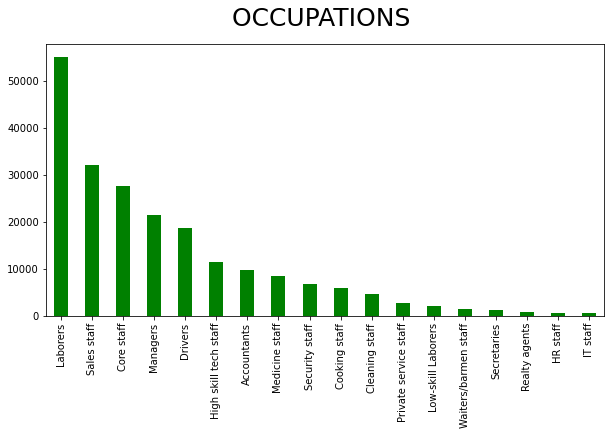

In [37]:
#plotting a percentage graph of "OCCUPATION_TYPE"
plt.figure(figsize = [10,5])
(inp1_apl["OCCUPATION_TYPE"].value_counts()).plot.bar(color = "green",width = .45)
plt.title("   OCCUPATIONS    " , fontdict = {"fontsize":25}, pad = 18)
plt.show()

## now lets standardize the values 

In [38]:
#lets check the cuurent condition of "inp1_apl" till now which we have cleaned 
inp1_apl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


###### from above result we can see that few columns have to be converted inn categorical for better understandings and those  columns are :-


In [39]:
# - AMT_INCOME_TOTAL,
# -AMT_CREDIT,
# -AMT_GOODS_PRICE

###### negtaive values columns are:-

In [40]:
# -DAYS_BIRTH
# -DAYS_EMPLOYED
# -DAYS_REGISTRATION
# -DAYS_ID_PUBLISH
# -DAYS_LAST_PHONE_CHANGE



##### Lets standardise AMT_INCOME_TOTAL, AMT_CREDIT , AMT_GOOD_PRICE columns:-

In [41]:
#Creating bins for income amount in term of Lakhs
inp1_apl["AMT_INCOME_TOTAL"] = inp1_apl["AMT_INCOME_TOTAL"]/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,11]
slot = ['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
inp1_apl["AMT_INCOME_RANGE"] = pd.cut(inp1_apl['AMT_INCOME_TOTAL'], bins, labels = slot)

In [42]:
round((inp1_apl["AMT_INCOME_RANGE"].value_counts()*100),3)

1L-2L        15589800
2L-3L         6517600
0-1L          6369800
3L-4L         1467600
4L-5L          536100
5L-6L          109500
6L-7L           86900
8L-9L           29800
7L-8L           16200
9L-10L           2800
10L Above        1800
Name: AMT_INCOME_RANGE, dtype: int64

In [43]:
#Creating bins for income amount in term of Lakhs
inp1_apl["AMT_CREDIT"] = inp1_apl["AMT_CREDIT"]/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slot = ['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
inp1_apl["AMT_CREDIT_RANGE"] = pd.cut(inp1_apl['AMT_CREDIT'], bins, labels = slot)

In [44]:
round((inp1_apl["AMT_CREDIT_RANGE"].value_counts()*100),3)

2L-3L        5481300
10L Above    4998500
5L-6L        3423200
4L-5L        3203800
1L-2L        3014000
3L-4L        2633800
6L-7L        2404900
8L-9L        2179200
7L-8L        1919300
9L-10L        892700
0-1L          600400
Name: AMT_CREDIT_RANGE, dtype: int64

In [45]:
#Creating bins for income amount in term of Lakhs
inp1_apl["AMT_GOODS_PRICE"] = inp1_apl["AMT_GOODS_PRICE"]/100000
bins = [0,1,2,3,4,5,6,7,8,9,10,100]
slot = ['0-1L','1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L Above']
inp1_apl["AMT_GOODS_PRICE_RANGE"] = pd.cut(inp1_apl['AMT_GOODS_PRICE'], bins, labels = slot)

In [46]:
round((inp1_apl["AMT_GOODS_PRICE_RANGE"].value_counts()*100),3)

2L-3L        6276100
4L-5L        5697300
6L-7L        4002400
10L Above    3411900
1L-2L        3295600
8L-9L        2148400
3L-4L        2121900
5L-6L        1311700
0-1L          870900
7L-8L         811000
9L-10L        776100
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

##### Lets standardise -ve columns

In [47]:
#creating variable called "negative_col" to store all negative column
negative_col = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]
(inp1_apl[negative_col].describe())

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,-16036.995067,63815.045904,-4986.120328,-2994.202373,-962.858788
std,4363.988632,141275.766519,3522.886321,1509.450419,826.808487
min,-25229.000000,-17912.000000,-24672.000000,-7197.000000,-4292.000000
25%,-19682.000000,-2760.000000,-7479.500000,-4299.000000,-1570.000000
50%,-15750.000000,-1213.000000,-4504.000000,-3254.000000,-757.000000
75%,-12413.000000,-289.000000,-2010.000000,-1720.000000,-274.000000
max,-7489.000000,365243.000000,0.000000,0.000000,0.000000


In [48]:
#lets correct those column which are in negative values
inp1_apl[negative_col] = abs(inp1_apl[negative_col])

In [49]:
inp1_apl[negative_col].describe()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE
count,307511.000000,307511.000000,307511.000000,307511.000000,307510.000000
mean,16036.995067,67724.742149,4986.120328,2994.202373,962.858788
std,4363.988632,139443.751806,3522.886321,1509.450419,826.808487
min,7489.000000,0.000000,0.000000,0.000000,0.000000
25%,12413.000000,933.000000,2010.000000,1720.000000,274.000000
50%,15750.000000,2219.000000,4504.000000,3254.000000,757.000000
75%,19682.000000,5707.000000,7479.500000,4299.000000,1570.000000
max,25229.000000,365243.000000,24672.000000,7197.000000,4292.000000


###### - no negative values present now 

In [50]:
# dividing the dataset into two datset of target = 1(client with payment difficulties) and taget = 0(all other)
target0_inp1_apl = inp1_apl.loc[inp1_apl["TARGET"]==0]
target1_inp1_apl = inp1_apl.loc[inp1_apl["TARGET"]==1]

In [51]:
#calculating imbalance persentage of application_data
round(len(target0_inp1_apl)/len(target1_inp1_apl),2)

11.39

###### the imbalance ratio is 11.39

In [52]:
# count plotting in logrithmic scale 

def uniplot(inp1_apl, col,title,hue =None):
    
    sns.set_style("whitegrid")
    sns.set_context("talk")
    plt.rcParams["axes.labelsize"] =  18
    plt.rcParams["axes.titlesize"] = 20
    plt.rcParams["axes.titlepad"] = 25
    
    
    temp = pd.Series(data = hue)
    fig,ax = plt.subplots()
    width = len(inp1_apl[col].unique()) +8+5*len(temp.unique())
    fig.set_size_inches(width, 9)
    plt.xticks(rotation = 90)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = inp1_apl , x = col, order = inp1_apl[col].value_counts().index, hue = hue,palette ="viridis")
    
    plt.show()

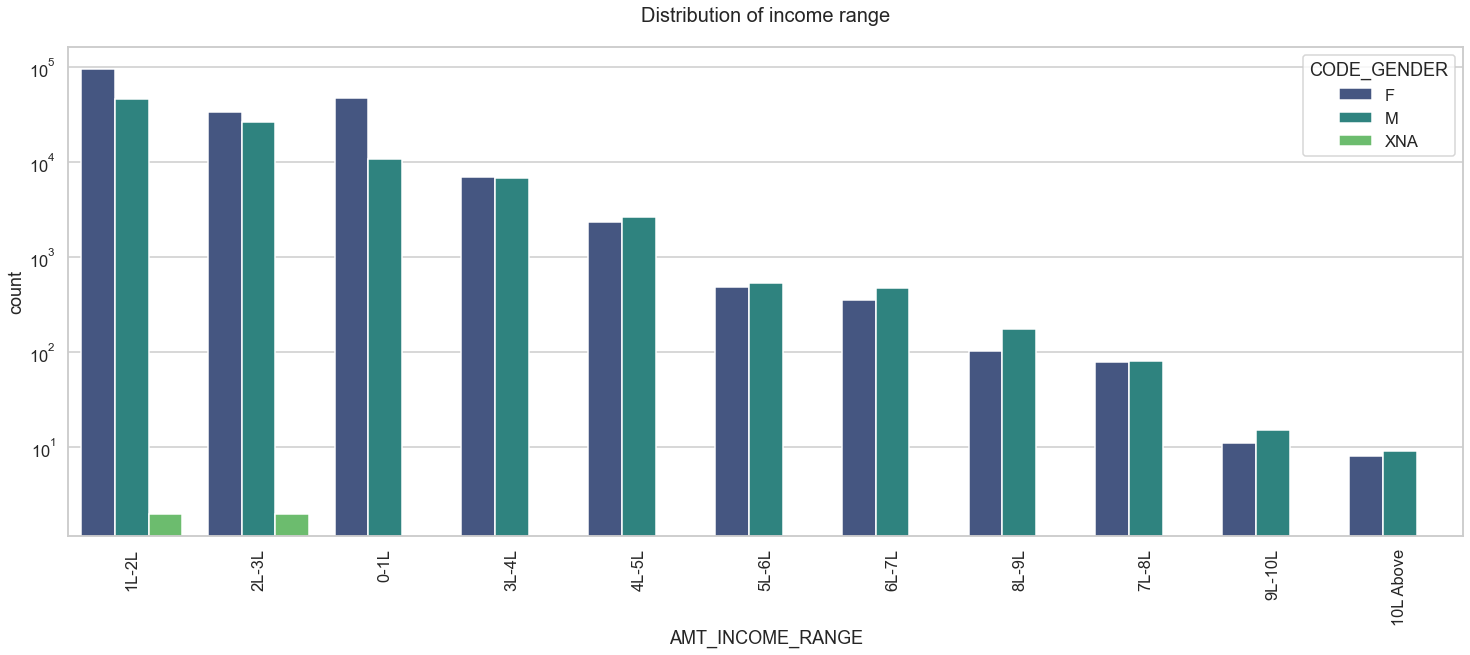

In [53]:
#Plotting of income wise by gender
uniplot(target0_inp1_apl,col ="AMT_INCOME_RANGE", title ="Distribution of income range", hue = "CODE_GENDER")

In [54]:
# we can see that from above graph
   #females counts are higher than male 
    #income range between 1L-2L have more no.of credits 

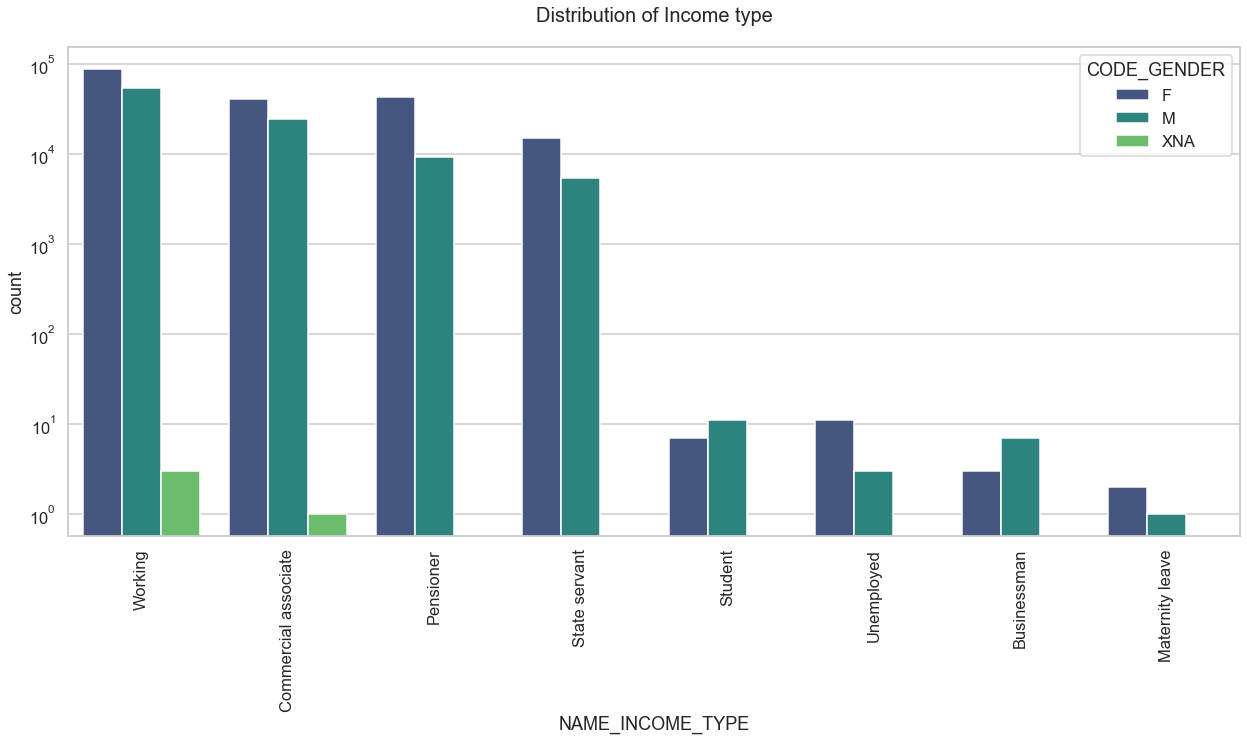

In [55]:
#income type plotting by profession(designation)
uniplot(target0_inp1_apl,col = "NAME_INCOME_TYPE", title = "Distribution of Income type", hue = "CODE_GENDER")

In [56]:
#we can see that from above graph
#those who are working and commercial associate have taken more credits then any other profession 


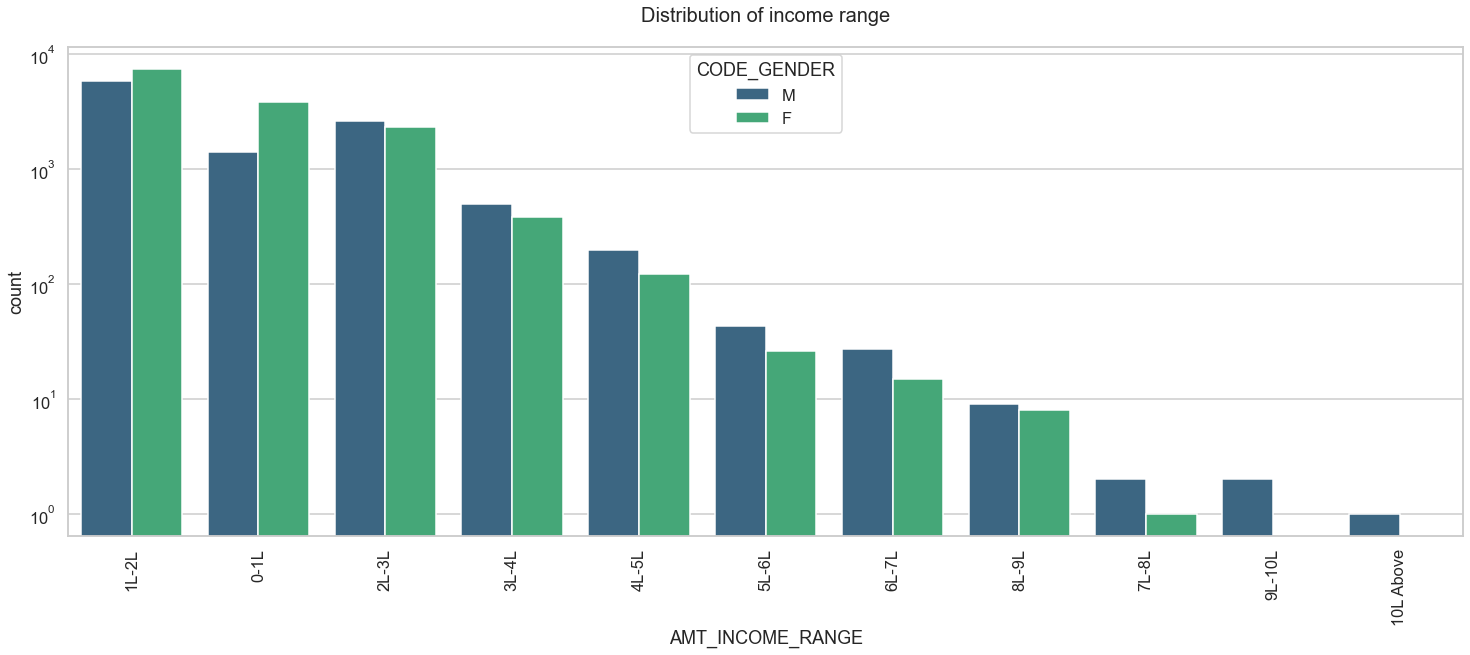

In [57]:
#income range plotting by gender wise of target = 1(client with paying difficulties)
uniplot(target1_inp1_apl,col='AMT_INCOME_RANGE',title='Distribution of income range',hue='CODE_GENDER')

In [58]:
#as you can see from the above graph
 # females are more than men for income range between 1L-2L and 0L-1L
 #but after 2L income range men are more than females 

In [59]:
#corelation for both target 0 and 1
target0_cor = target0_inp1_apl.iloc[0:,2:]
target1_cor = target1_inp1_apl.iloc[0:,2:]

target0 = target0_cor.corr(method = "spearman")
target1 = target1_cor.corr(method = "spearman")

In [60]:
#corelation for target0
target0

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,0.038308,0.002315,0.024767,-0.001293,-0.025551,-0.375639,-0.205693,-0.180517,0.019986,...,0.006632,0.001064,0.002601,-0.002096,0.001279,0.000760,-0.001295,-0.001233,-0.007722,-0.044217
AMT_INCOME_TOTAL,0.038308,1.000000,0.416017,0.485699,0.419929,0.097772,-0.093515,-0.095898,-0.076387,-0.035931,...,0.002745,0.008592,0.003183,-0.000926,0.002692,0.006026,0.009407,0.073695,0.027426,0.061557
AMT_CREDIT,0.002315,0.416017,1.000000,0.831900,0.985510,0.053570,0.057151,0.017986,-0.009416,0.001982,...,0.024189,0.017017,0.023475,-0.020882,-0.003655,0.000362,-0.004833,0.045454,0.024427,-0.035046
AMT_ANNUITY,0.024767,0.485699,0.831900,1.000000,0.830368,0.058591,-0.011740,-0.030195,-0.037717,-0.016569,...,-0.016307,0.004666,0.011397,-0.023413,0.003495,0.002631,0.011853,0.050662,0.022429,0.001119
AMT_GOODS_PRICE,-0.001293,0.419929,0.985510,0.830368,1.000000,0.062650,0.058256,0.022659,-0.009528,0.004018,...,0.020974,0.015906,0.023502,-0.019221,-0.002800,0.000607,-0.004285,0.046295,0.025164,-0.037155
REGION_POPULATION_RELATIVE,-0.025551,0.097772,0.053570,0.058591,0.062650,1.000000,0.030730,-0.003651,0.036684,0.010463,...,0.011300,0.001607,0.000187,0.001998,-0.004555,-0.000730,-0.004799,0.048535,-0.001181,0.004876
DAYS_BIRTH,-0.375639,-0.093515,0.057151,-0.011740,0.058256,0.030730,1.000000,0.583711,0.298130,0.261979,...,-0.046654,-0.003724,-0.009730,-0.025665,-0.004558,-0.002876,0.001635,-0.013089,0.011576,0.061824
DAYS_EMPLOYED,-0.205693,-0.095898,0.017986,-0.030195,0.022659,-0.003651,0.583711,1.000000,0.201306,0.259900,...,-0.041543,-0.007434,-0.010727,-0.016687,-0.000893,0.000184,0.002578,-0.007851,0.012346,0.041381
DAYS_REGISTRATION,-0.180517,-0.076387,-0.009416,-0.037717,-0.009528,0.036684,0.298130,0.201306,1.000000,0.094153,...,-0.016771,-0.005168,-0.007717,-0.003580,0.003547,0.001472,0.002519,0.006138,0.000074,0.021553
DAYS_ID_PUBLISH,0.019986,-0.035931,0.001982,-0.016569,0.004018,0.010463,0.261979,0.259900,0.094153,1.000000,...,-0.015857,-0.001573,-0.000463,-0.015880,-0.004817,0.000099,0.002464,0.007989,0.010705,0.032853


In [61]:
#corelation for target1
target1

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
CNT_CHILDREN,1.000000,-0.004749,0.000200,0.033679,-0.007572,-0.031628,-0.267862,-0.127943,-0.133658,0.027320,...,0.007484,-0.002592,0.000519,0.005621,0.000564,-0.011009,-0.004516,-0.013416,-0.015320,-0.036691
AMT_INCOME_TOTAL,-0.004749,1.000000,0.359276,0.431617,0.362780,0.051463,0.007238,-0.036127,-0.036671,0.005929,...,-0.019868,0.001599,-0.003761,-0.001245,0.010661,-0.002371,0.018841,0.079795,0.025086,0.081913
AMT_CREDIT,0.000200,0.359276,1.000000,0.811443,0.977224,0.039919,0.155216,0.082434,0.017099,0.053780,...,0.004085,0.006804,0.014907,-0.030095,0.002944,-0.004877,0.002992,0.044705,-0.019015,-0.026472
AMT_ANNUITY,0.033679,0.431617,0.811443,1.000000,0.804931,0.023297,0.030483,-0.003396,-0.035900,0.014472,...,-0.039678,-0.003412,0.001043,-0.032648,0.014390,-0.004444,0.030202,0.065508,-0.003439,-0.005174
AMT_GOODS_PRICE,-0.007572,0.362780,0.977224,0.804931,1.000000,0.054140,0.157778,0.092648,0.019172,0.059736,...,-0.000381,0.005974,0.013988,-0.028568,0.006146,-0.005003,0.003662,0.048002,-0.015998,-0.026238
REGION_POPULATION_RELATIVE,-0.031628,0.051463,0.039919,0.023297,0.054140,1.000000,0.046398,0.020003,0.034315,0.023668,...,0.009487,-0.000528,0.001129,0.010502,-0.005804,0.000816,-0.002187,0.049689,-0.014709,0.008659
DAYS_BIRTH,-0.267862,0.007238,0.155216,0.030483,0.157778,0.046398,1.000000,0.466526,0.232940,0.251626,...,-0.029293,0.000060,0.000121,-0.037018,-0.015904,-0.001271,0.003331,-0.005324,0.010736,0.080880
DAYS_EMPLOYED,-0.127943,-0.036127,0.082434,-0.003396,0.092648,0.020003,0.466526,1.000000,0.148988,0.209881,...,-0.032292,-0.014439,-0.000243,-0.016487,-0.011467,0.001024,0.003701,-0.004917,-0.001745,0.055502
DAYS_REGISTRATION,-0.133658,-0.036671,0.017099,-0.035900,0.019172,0.034315,0.232940,0.148988,1.000000,0.095750,...,-0.006988,-0.002263,0.003188,-0.001066,0.001959,0.003078,-0.004176,-0.013722,0.007161,0.010568
DAYS_ID_PUBLISH,0.027320,0.005929,0.053780,0.014472,0.059736,0.023668,0.251626,0.209881,0.095750,1.000000,...,-0.010475,0.008793,0.003991,-0.021266,-0.002735,0.013353,-0.003583,0.009518,-0.008408,0.044789


In [62]:
#now lets plot the corelation with heat map to visualise
def targets_corr(data,title):
    plt.figure(figsize = (17,12))
    plt.rcParams["axes.titlesize"] = 27
    plt.rcParams["axes.titlepad"] = 75
    
#heatmap color

    sns.heatmap(data,cmap = "YlGnBu", annot = False)
    
    plt.title(title)
    plt.yticks(rotation = 0)
    plt.show()

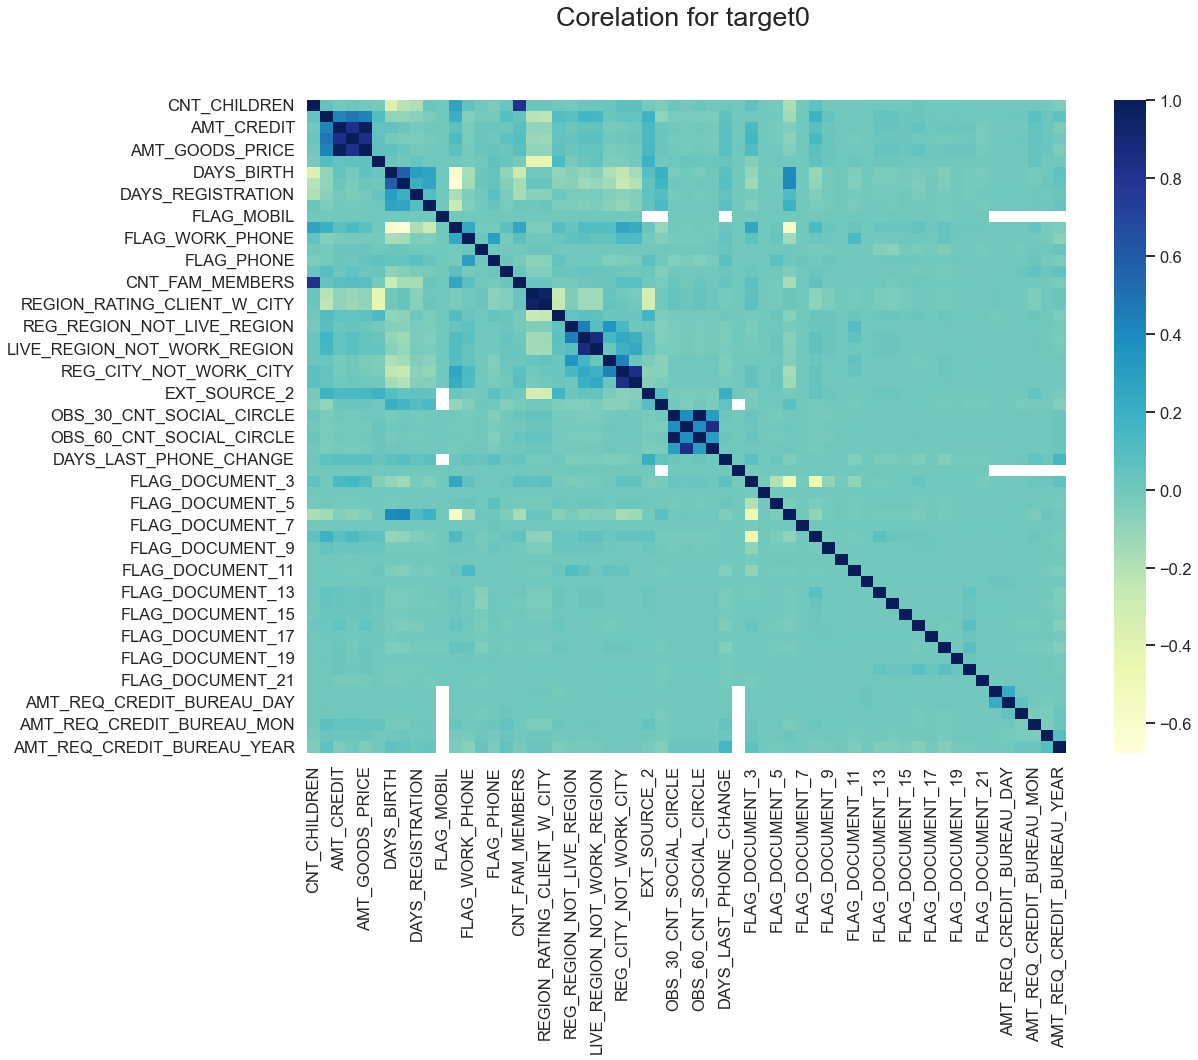

In [63]:
#for target0 
targets_corr(data = target0, title = "Corelation for target0 ")

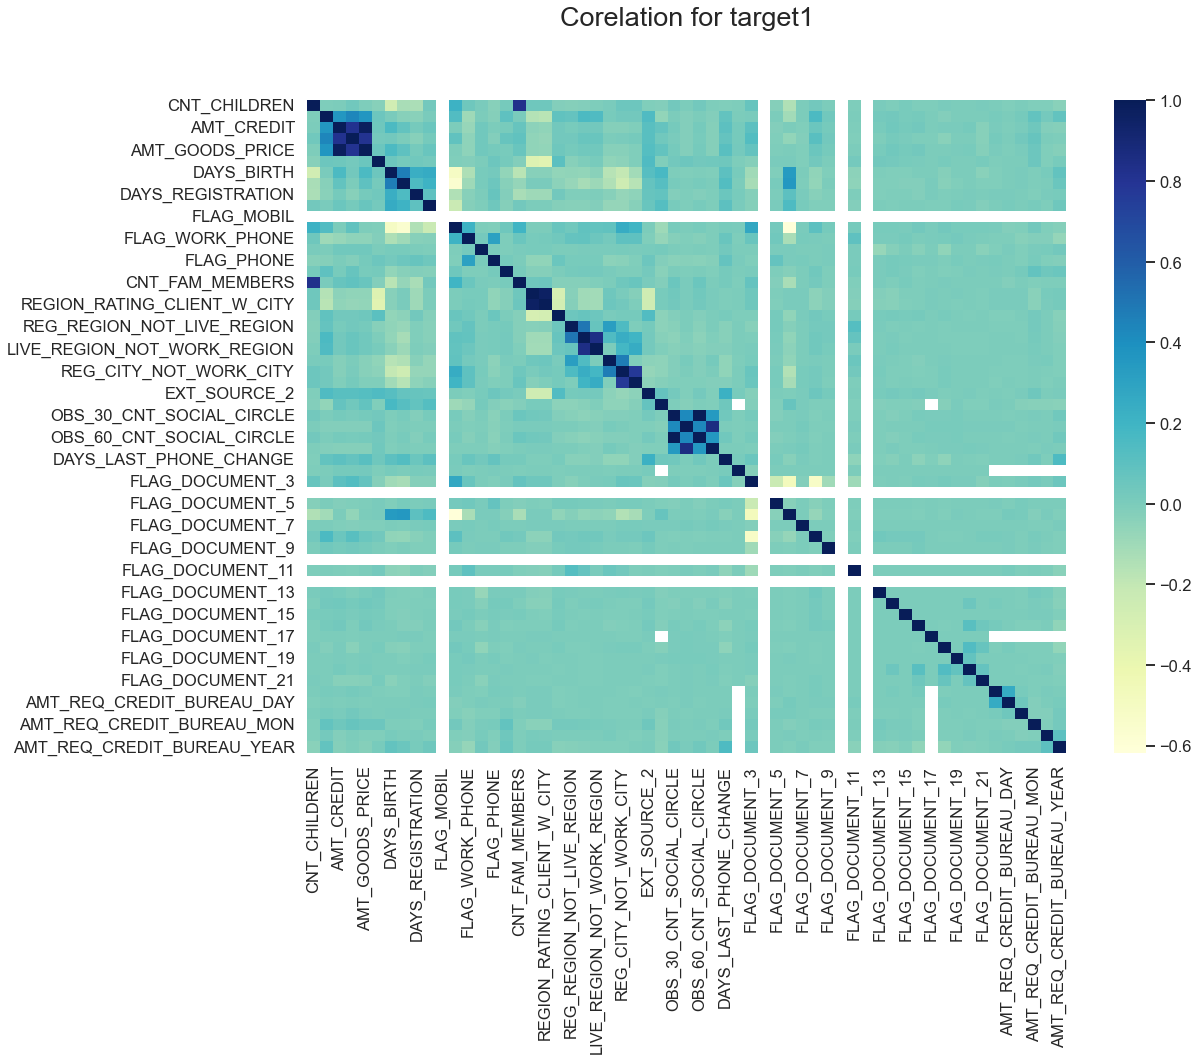

In [64]:
#for target1 
targets_corr(data = target1, title = "Corelation for target1")

## Outliers

In [65]:
inp1_apl.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307499.000000,307233.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979,5.990260,27108.573909,5.383962,0.020868,16036.995067,67724.742149,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231,4.024908,14493.737315,3.694465,0.013831,4363.988632,139443.751806,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,0.256500,0.450000,1615.500000,0.405000,0.000290,7489.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000,2.700000,16524.000000,2.385000,0.010006,12413.000000,933.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500,5.135310,24903.000000,4.500000,0.018850,15750.000000,2219.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000,8.086500,34596.000000,6.795000,0.028663,19682.000000,5707.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1170.000000,40.500000,258025.500000,40.500000,0.072508,25229.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


###### From describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:

In [66]:
#outlier stored in variable called "out"
out = ["CNT_CHILDREN","AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION"]


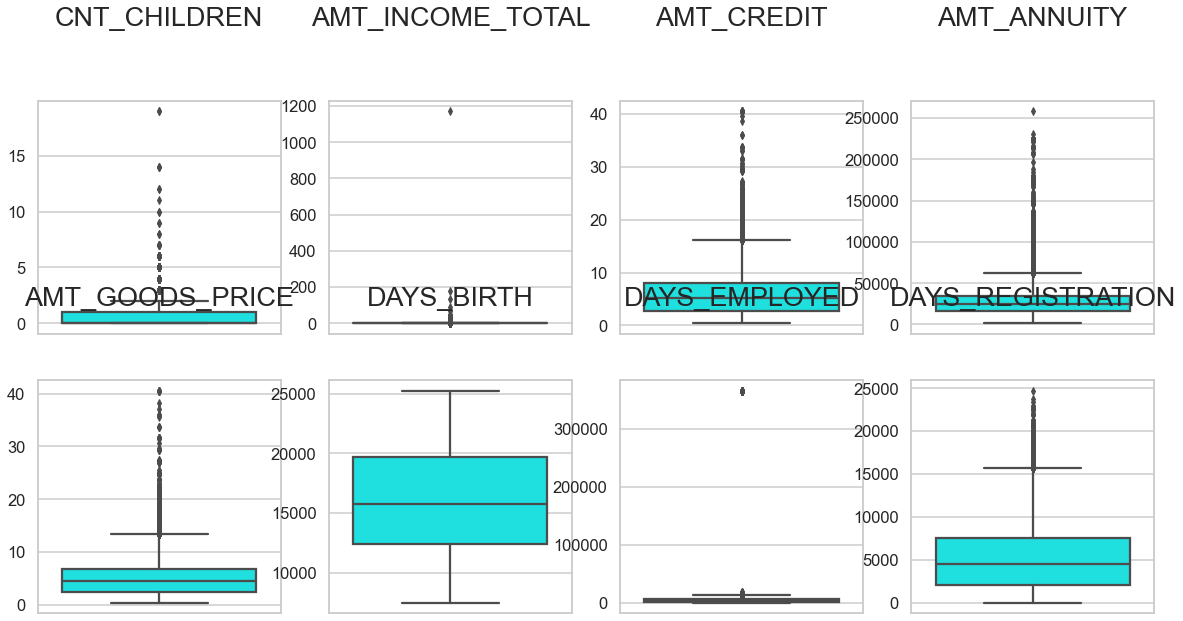

In [67]:
import itertools 
plt.figure(figsize=[20,30])
for i,j in itertools.zip_longest(out, range(len(out))):
    plt.subplot(6,4,j+1)
    sns.boxplot(y = inp1_apl[i], color = "cyan")
    #plt.yticks(fontsize=10)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

## summary



In [68]:
# - AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.
# -AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.
# DAYS_BIRTH has no outliers which means the data available is reliable.


In [69]:
#lets check info for the last time before giving a summary 
inp1_apl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 76 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

## summary on application_data:-

In [70]:
#there are 3,07,511 rows and 76 columns

In [71]:
#Found the Null values, Filled them with "Unknown" variable.
#Removed unwanted columns and other columns.
#We have worked on the negative values and converted them into positive values in some of columns.

In [72]:
 #3 types of datatypes are there:-
    #integer
    #float
    #strings
 

## Data cleaning and Manipulation of "previous_application.csv":-

In [73]:
#but before cleaning and manipulation lets go through info and describe of previous_application.csv
inp2_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [74]:
inp2_pr.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### missing values 

In [75]:
#lets find missing values of "previous_application.csv"
print(nulls(inp2_pr))


RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
AMT_DOWN_PAYMENT               53.64
RATE_DOWN_PAYMENT              53.64
NAME_TYPE_SUITE                49.12
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_TERMINATION               40.30
DAYS_LAST_DUE                  40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_FIRST_DUE                 40.30
DAYS_FIRST_DRAWING             40.30
AMT_GOODS_PRICE                23.08
AMT_ANNUITY                    22.29
CNT_PAYMENT                    22.29
PRODUCT_COMBINATION             0.02
AMT_CREDIT                      0.00
NAME_YIELD_GROUP                0.00
NAME_PORTFOLIO                  0.00
NAME_SELLER_INDUSTRY            0.00
SELLERPLACE_AREA                0.00
CHANNEL_TYPE                    0.00
NAME_PRODUCT_TYPE               0.00
SK_ID_PREV                      0.00
NAME_GOODS_CATEGORY             0.00
NAME_CLIENT_TYPE                0.00
CODE_REJECT_REASON              0.00
SK_ID_CURR                      0.00
D

###### as per above percentage there are so many columns which are missing and are above 50% lets find out the missing value which are above 50%¶

In [76]:
#to find out the column which have more than 50% missing values lets give them a new variable "pr_50"
pr_50 = nulls(inp2_pr)[nulls(inp2_pr)>50]
print(pr_50)
print()
print("total", len(pr_50),"values are above 50%")

RATE_INTEREST_PRIVILEGED    99.64
RATE_INTEREST_PRIMARY       99.64
AMT_DOWN_PAYMENT            53.64
RATE_DOWN_PAYMENT           53.64
dtype: float64

total 4 values are above 50%


In [77]:
#now lets drop this column("pr_50") from inp2_pr
inp2_pr =inp2_pr.drop(columns = pr_50.index)

In [78]:
#lets check the columns which we drop is successfully get removed or not 
inp2_pr.shape

(1670214, 33)

In [79]:
#as we can see columns got reduced from 37 to 33 

#### calculating remaining missing value

In [80]:
#column which have more than 15% missing value . lets name the variable "pr_15"
pr_15 = nulls(inp2_pr)[nulls(inp2_pr)>15]
print(pr_15)
print()
print("total", len(pr_15),"values are above 15%")

NAME_TYPE_SUITE              49.12
DAYS_FIRST_DRAWING           40.30
DAYS_TERMINATION             40.30
DAYS_LAST_DUE                40.30
DAYS_LAST_DUE_1ST_VERSION    40.30
DAYS_FIRST_DUE               40.30
NFLAG_INSURED_ON_APPROVAL    40.30
AMT_GOODS_PRICE              23.08
AMT_ANNUITY                  22.29
CNT_PAYMENT                  22.29
dtype: float64

total 10 values are above 15%


In [81]:
inp2_pr.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [82]:
#listing out column which we dont want to be in "previous_application.csv" and naming that vairable "d_n"
d_n = ["WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY"]
inp2_pr = inp2_pr.drop(d_n,axis =1)
inp2_pr.shape

(1670214, 29)

In [83]:
inp2_pr=inp2_pr.drop(inp2_pr[inp2_pr['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp2_pr=inp2_pr.drop(inp2_pr[inp2_pr['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
inp2_pr=inp2_pr.drop(inp2_pr[inp2_pr['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

inp2_pr.shape

(69635, 29)

In [84]:
#analysing numerical column using describe
inp2_pr[pr_15.index].describe()

,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,24640.0,24640.000000,24640.000000,24640.000000,24640.000000,24640.000000,6.963500e+04,69372.000000,69372.000000
mean,365243.0,75769.522159,74311.325893,-132.818547,-641.426664,0.705276,4.533566e+05,25682.780030,29.640849
std,0.0,148658.839920,147606.619424,719.129314,6616.309277,0.455928,4.917079e+05,17426.515193,17.666787
min,365243.0,-2269.000000,-2276.000000,-2276.000000,-2426.000000,0.000000,0.000000e+00,0.000000,5.000000
25%,365243.0,-557.000000,-564.000000,-384.000000,-767.000000,0.000000,1.350000e+05,13595.175000,12.000000
50%,365243.0,-295.000000,-301.000000,-52.000000,-593.000000,1.000000,2.700000e+05,21368.250000,24.000000
75%,365243.0,-52.000000,-59.000000,307.000000,-431.000000,1.000000,6.075000e+05,32681.250000,48.000000
max,365243.0,365243.000000,365243.000000,1753.000000,365243.000000,1.000000,4.050000e+06,418058.145000,60.000000


In [85]:
#convert negative columns to positive columns naming the variable "n_c1"
n_c1 = ["DAYS_FIRST_DRAWING","DAYS_TERMINATION","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE"]
inp2_pr[n_c1] = abs(inp2_pr[n_c1])
inp2_pr[pr_15.index].describe() #after converting negative value to positive



,DAYS_FIRST_DRAWING,DAYS_TERMINATION,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,NFLAG_INSURED_ON_APPROVAL,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT
count,24640.0,24640.000000,24640.000000,24640.000000,24640.000000,24640.000000,6.963500e+04,69372.000000,69372.000000
mean,365243.0,76671.996185,75224.850406,526.861323,878.597443,0.705276,4.533566e+05,25682.780030,29.640849
std,0.0,148195.379793,147143.139803,507.143306,6589.008158,0.455928,4.917079e+05,17426.515193,17.666787
min,365243.0,2.000000,3.000000,0.000000,12.000000,0.000000,0.000000e+00,0.000000,5.000000
25%,365243.0,260.000000,262.000000,156.000000,432.000000,0.000000,1.350000e+05,13595.175000,12.000000
50%,365243.0,496.000000,499.000000,352.000000,593.000000,1.000000,2.700000e+05,21368.250000,24.000000
75%,365243.0,1741.250000,1722.000000,714.000000,767.000000,1.000000,6.075000e+05,32681.250000,48.000000
max,365243.0,365243.000000,365243.000000,2276.000000,365243.000000,1.000000,4.050000e+06,418058.145000,60.000000


### finding outliers

In [86]:
# From describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:

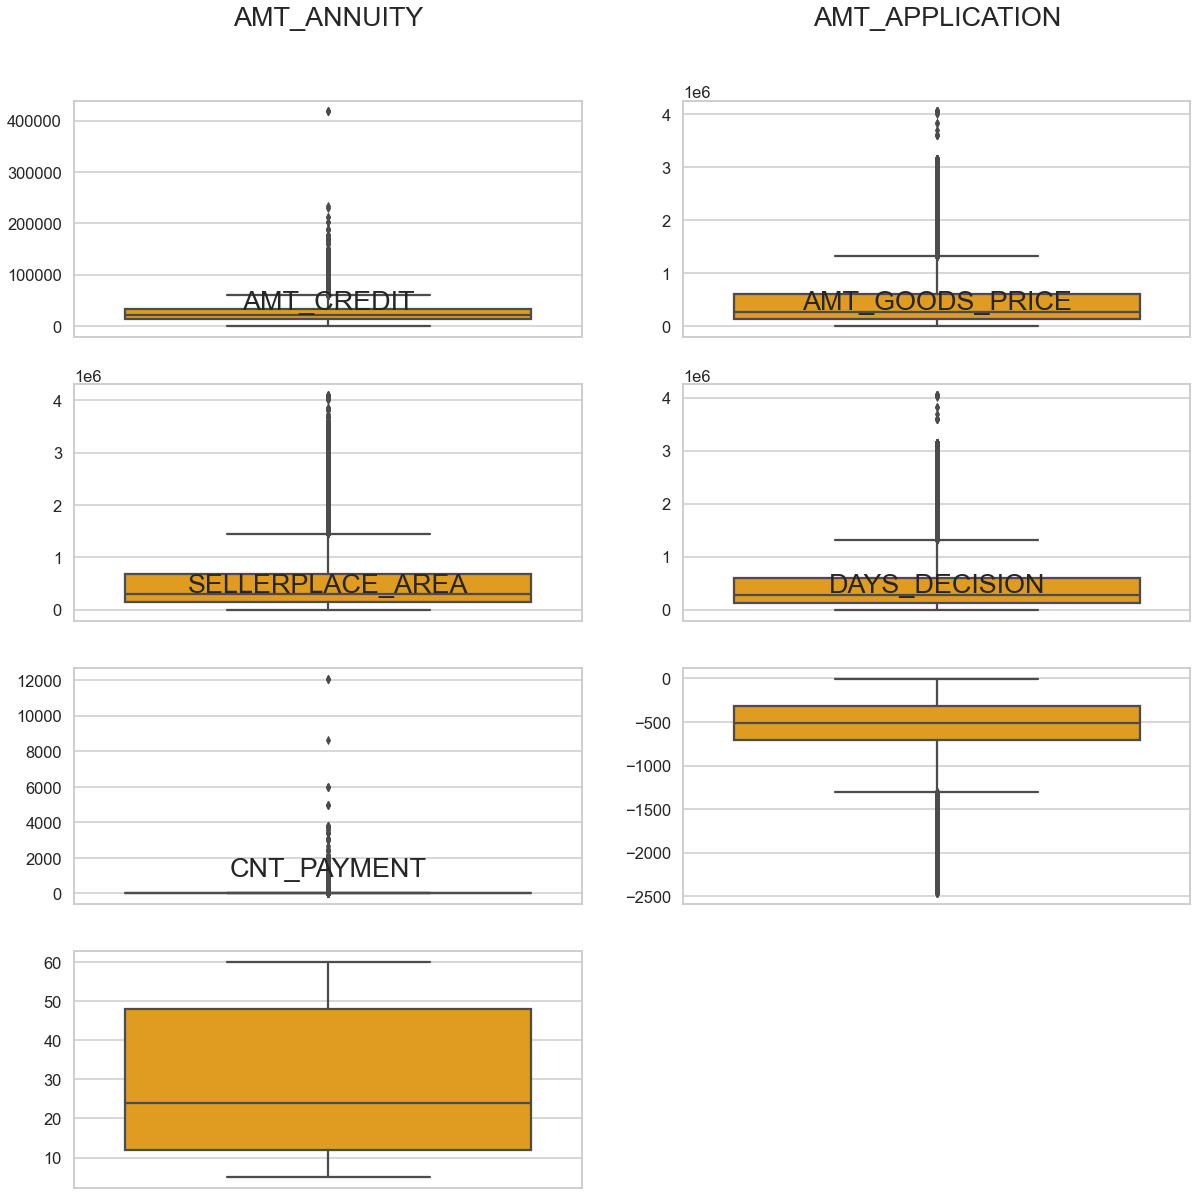

In [87]:
pr_outr = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

plt.figure(figsize=[20,20])
for i,j in itertools.zip_longest(pr_outr, range(len(pr_outr))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = inp2_pr[i], color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

## summary

In [88]:
#AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA consist max. number of outliers. 
#CNT_PAYMENT consist less outlier values.
#DAYS_DECISION has little number of outliers indicating that these previous applications decisions.


### check for imbalance in data


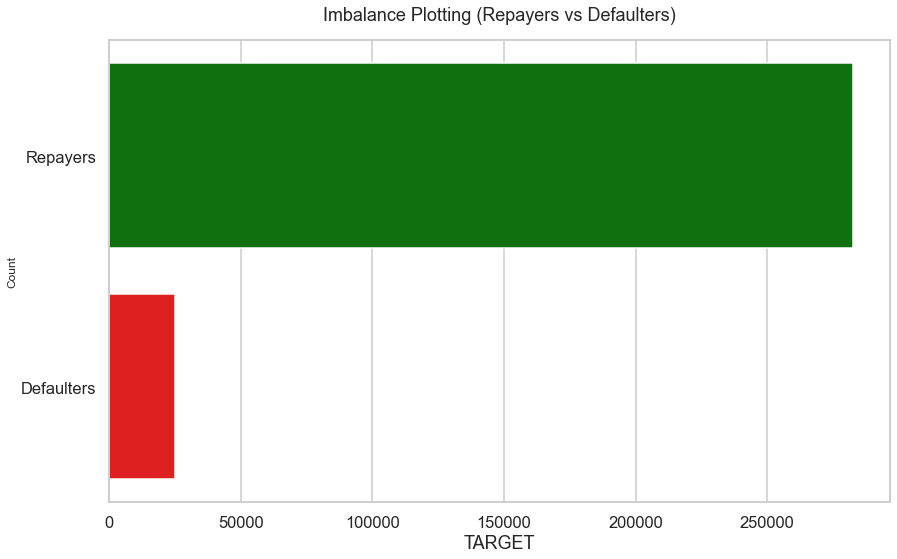

In [89]:
plt.figure(figsize =[14,8.5])
sns.barplot(y=["Repayers", "Defaulters"], x = inp1_apl["TARGET"].value_counts(),palette = ["g", "r"])
plt.ylabel("Loan Repayment Status", fontdict = {"fontsize":18})
plt.ylabel("Count", fontdict = {"fontsize":12})
plt.title("Imbalance Plotting (Repayers vs Defaulters)", fontdict = {"fontsize":18},pad = 20)
plt.show()

In [90]:
repayer = round((inp1_apl["TARGET"].value_counts()[0]/len(inp1_apl)*100),2)
print("Repayer Percenyage is {}%".format(repayer))
defaulter = round((inp1_apl["TARGET"].value_counts()[1]/len(inp1_apl)*100),2)
print("Defaulter Percentage is {}%".format(defaulter))
print("Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 (approx)".format(repayer/defaulter))

Repayer Percenyage is 91.93%
Defaulter Percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 (approx)


In [91]:
loan_data = pd.merge(left = inp1_apl,right =inp2_pr, how = "inner", on = "SK_ID_CURR", suffixes = "_x")
loan_data

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100034,0,Revolving loans,M,N,Y,0,0.900,1.800000,9000.0,...,XNA,6.0,high,Cash Street: high,365243.0,569.0,419.0,449.0,443.0,1.0
1,100035,0,Cash loans,F,N,Y,0,2.925,6.658920,24592.5,...,XNA,60.0,low_action,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
2,100039,0,Cash loans,M,Y,N,1,3.600,7.333155,39069.0,...,XNA,42.0,low_normal,Cash Street: low,365243.0,665.0,565.0,455.0,446.0,1.0
3,100046,0,Revolving loans,M,Y,Y,0,1.800,5.400000,27000.0,...,XNA,18.0,low_normal,Cash Street: low,365243.0,509.0,1.0,365243.0,365243.0,1.0
4,100046,0,Revolving loans,M,Y,Y,0,1.800,5.400000,27000.0,...,XNA,24.0,low_normal,Cash Street: low,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59408,456236,0,Cash loans,M,Y,Y,0,5.850,15.750000,43443.0,...,XNA,12.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN
59409,456244,0,Cash loans,F,N,Y,0,2.610,13.038120,35982.0,...,XNA,12.0,high,Cash Street: high,365243.0,2119.0,1789.0,1879.0,1874.0,0.0
59410,456245,0,Cash loans,F,N,Y,3,0.810,2.695500,11871.0,...,Connectivity,12.0,high,Cash Street: high,365243.0,418.0,88.0,88.0,80.0,1.0
59411,456249,0,Cash loans,F,N,Y,0,1.125,2.250000,22050.0,...,XNA,12.0,high,Cash Street: high,365243.0,1495.0,1165.0,1165.0,1156.0,0.0


# Univariate Analysis

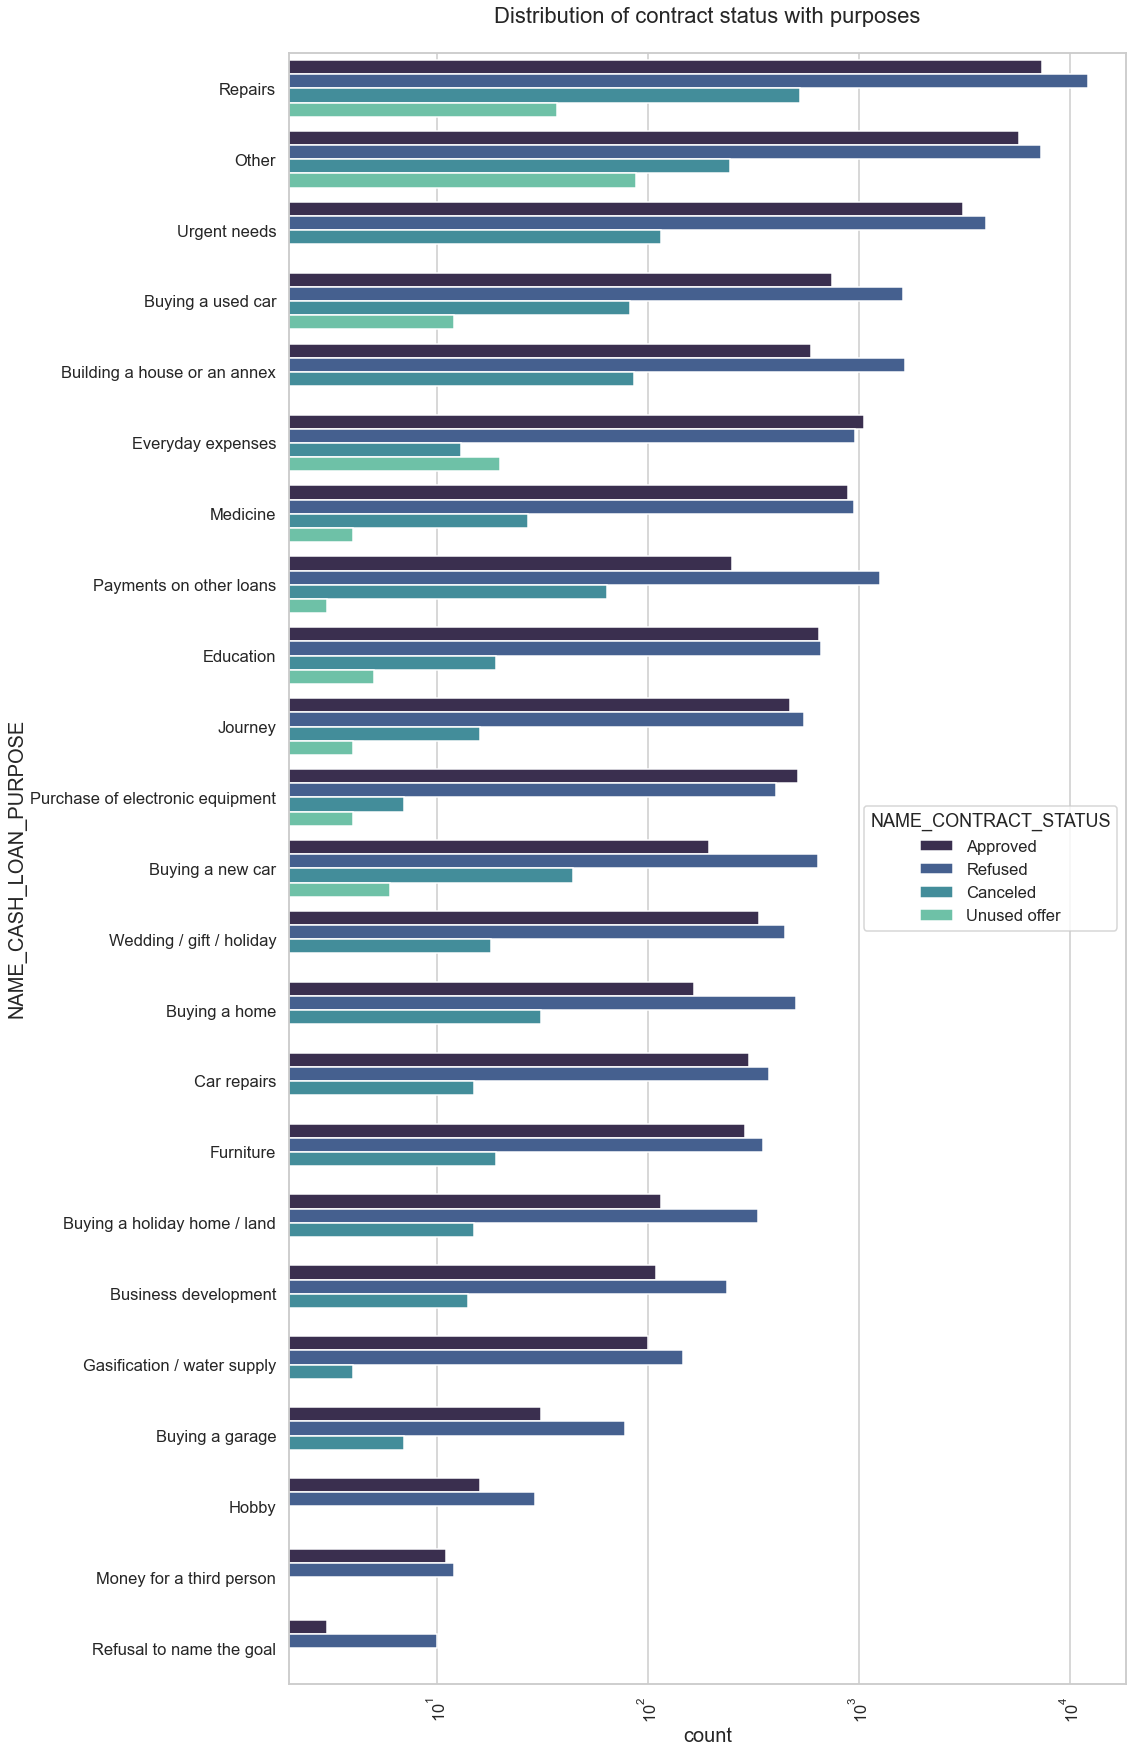

In [92]:
#Distribution of contract status in  logrithmic scale
sns.set_style("whitegrid")
sns.set_context("talk")

plt.figure(figsize =(15,30))
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["axes.titlepad"] = 30
plt.xticks(rotation = 90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
ax =sns.countplot(data = loan_data, y = "NAME_CASH_LOAN_PURPOSE", order = loan_data["NAME_CASH_LOAN_PURPOSE"].value_counts().index,hue ="NAME_CONTRACT_STATUS",palette = "mako"
                 )         

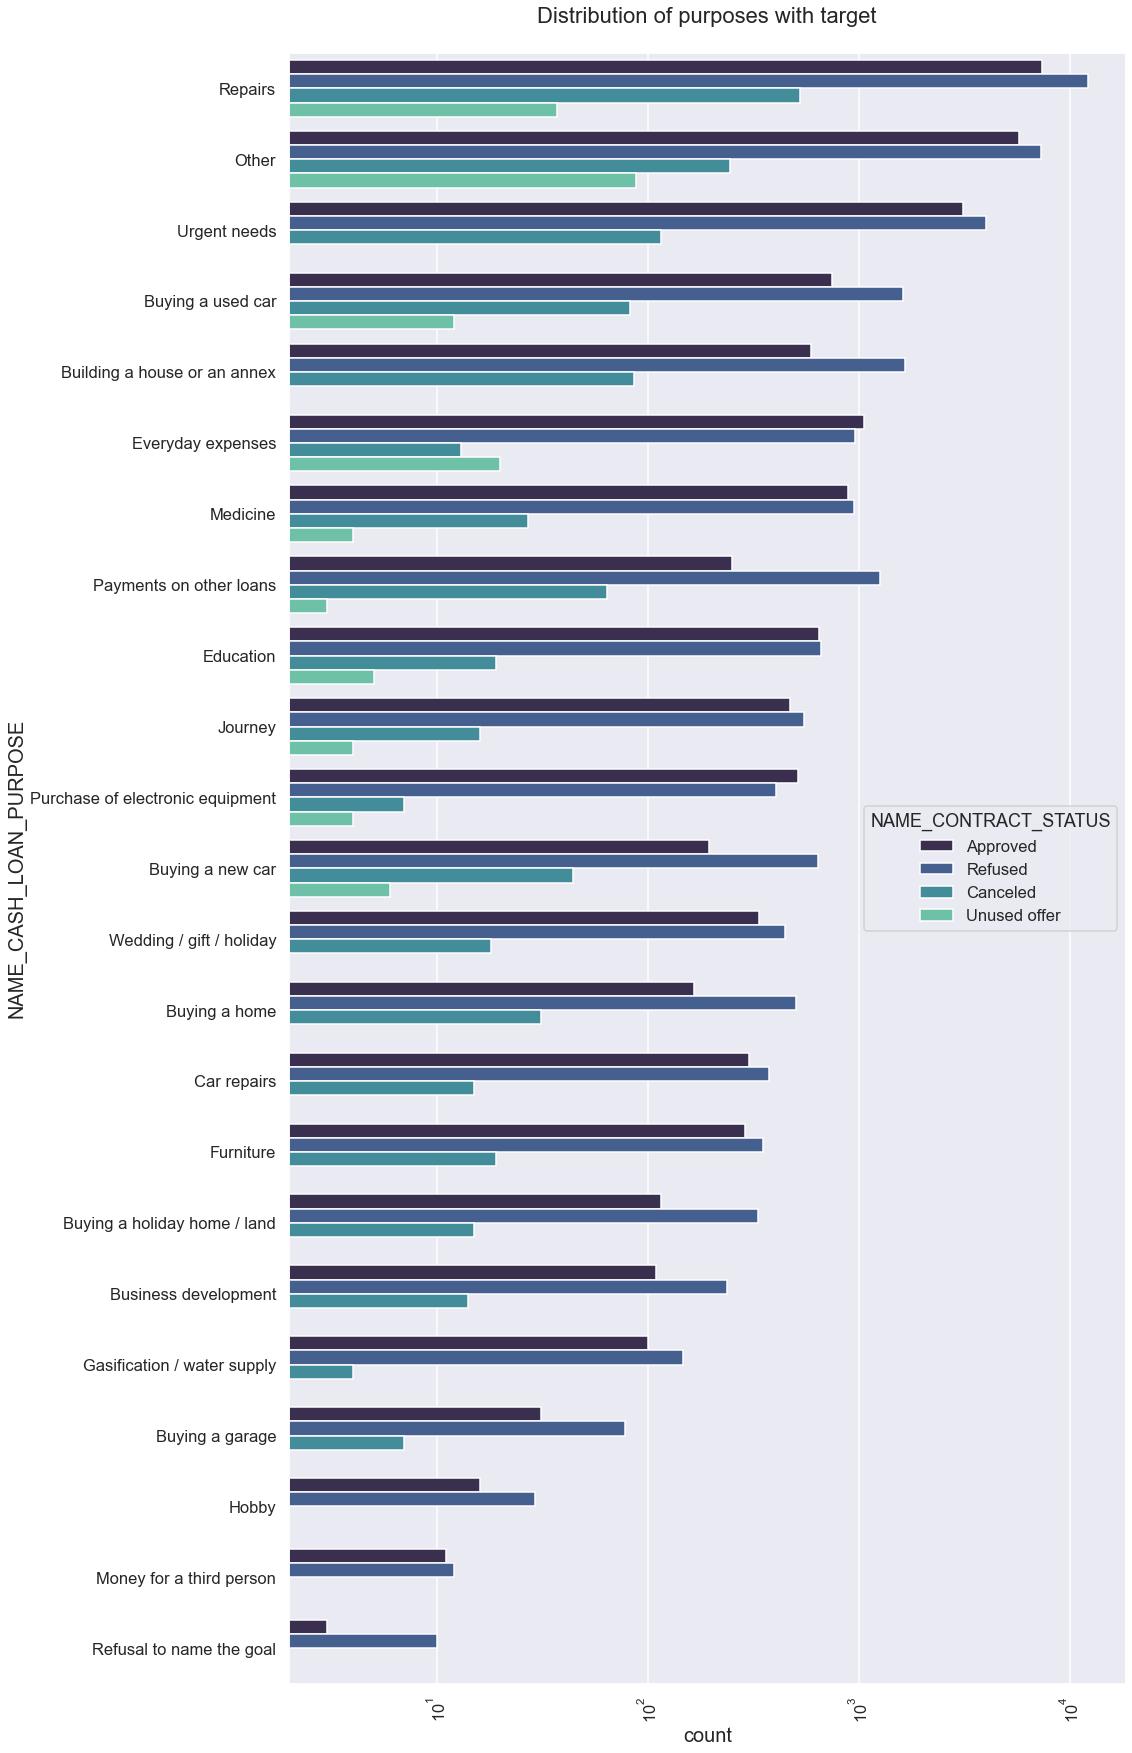

In [93]:
#distribution of contract status
sns.set_style("darkgrid")
sns.set_context("talk")

plt.figure(figsize =(15,30))
plt.rcParams["axes.labelsize"] = 20 
plt.rcParams["axes.titlesize"] = 22
plt.rcParams["axes.titlepad"] = 30
plt.xticks(rotation = 90)
plt.xscale("log")
plt.title("Distribution of purposes with target")
ax =sns.countplot(data = loan_data, y = "NAME_CASH_LOAN_PURPOSE", order = loan_data["NAME_CASH_LOAN_PURPOSE"].value_counts().index,hue ="NAME_CONTRACT_STATUS",palette = "mako"
                 )        

## Bivariate Analysis

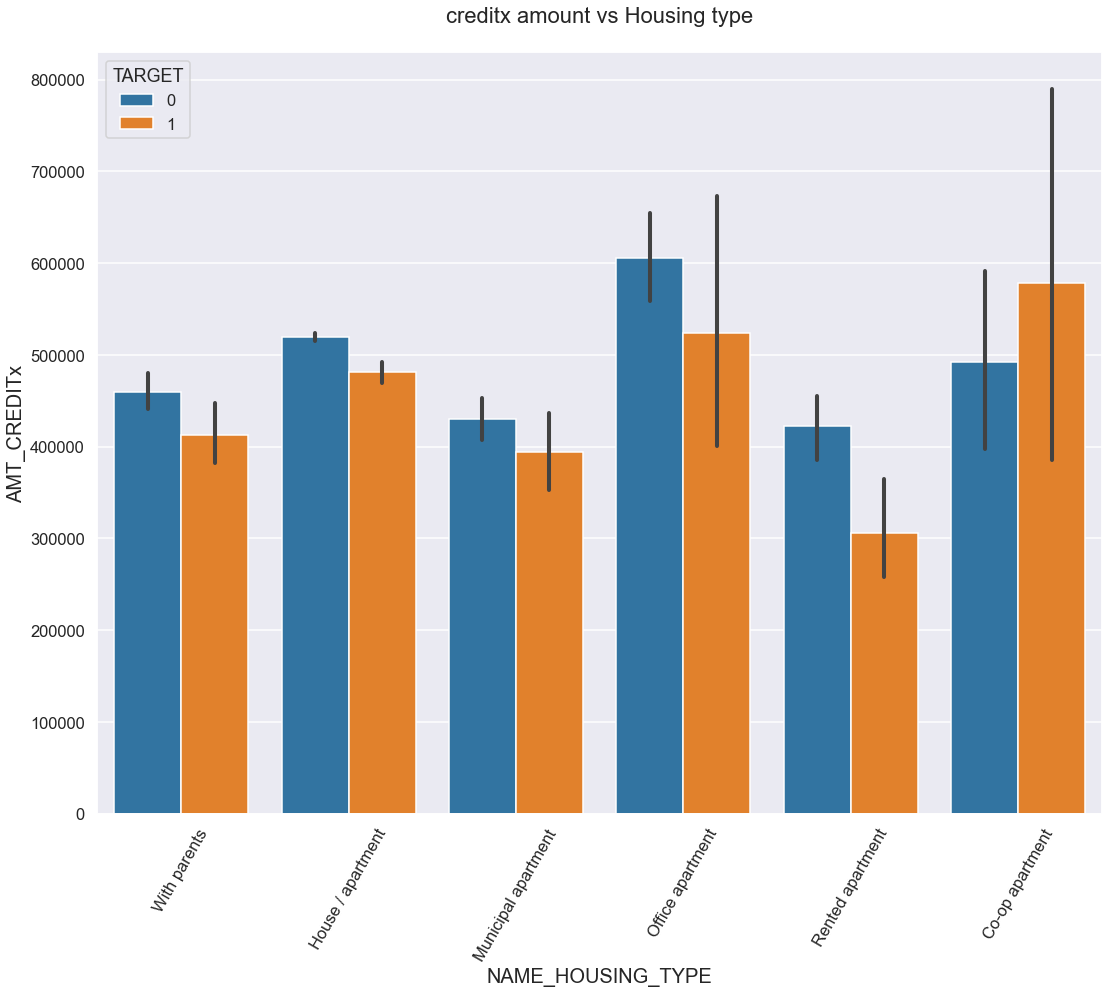

In [94]:
#Box plotting for credit amount creditx vs housing type in lograithmic scale
plt.figure(figsize = (18,14))
plt.xticks(rotation = 60)
sns.barplot(data = loan_data,y="AMT_CREDITx", hue = "TARGET", x = "NAME_HOUSING_TYPE")
plt.title("creditx amount vs Housing type")
plt.show()

# CONCLUSION

###### bank should keep more focus on "student" , pensioner and businessman for successful payments

###### bank should focus less on wokring and commercial associate as we can see they are facing difficulties for payments mean they can be consider as defaulters